In [7]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [8]:
df = pd.read_csv('./data/update_data.csv')
df.head(20)
df = df.drop(columns='Unnamed: 0')

In [9]:
X_obj = df.drop(['label'], axis=1)
y_label = df['label']
y_label.columns = ['label']
X_train, X_test, y_train, y_test = train_test_split(
  X_obj, y_label, random_state=104, test_size=0.5, shuffle=True)

# Stsndartisation
sc = StandardScaler() 
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

# RF model
rfc = RandomForestClassifier(n_estimators = 100, max_depth=20, max_features=4)
rfc.fit(X_train, y_train)
display(rfc.score(X_train, y_train))

1.0

In [10]:
y_pred = rfc.predict(X_test)

conf_matrix_baseline = pd.DataFrame(confusion_matrix(y_test, y_pred), index = ['actual 0', 'actual 1'], columns = ['predicted 0', 'predicted 1'])
display(conf_matrix_baseline)
display('accuracy = ', accuracy_score(y_test, y_pred))
display('recall = ', recall_score(y_test, y_pred))
display('precision = ', precision_score(y_test, y_pred))

,predicted 0,predicted 1
actual 0,108,3
actual 1,5,237


'accuracy = '

0.9773371104815864

'recall = '

0.9793388429752066

'precision = '

0.9875

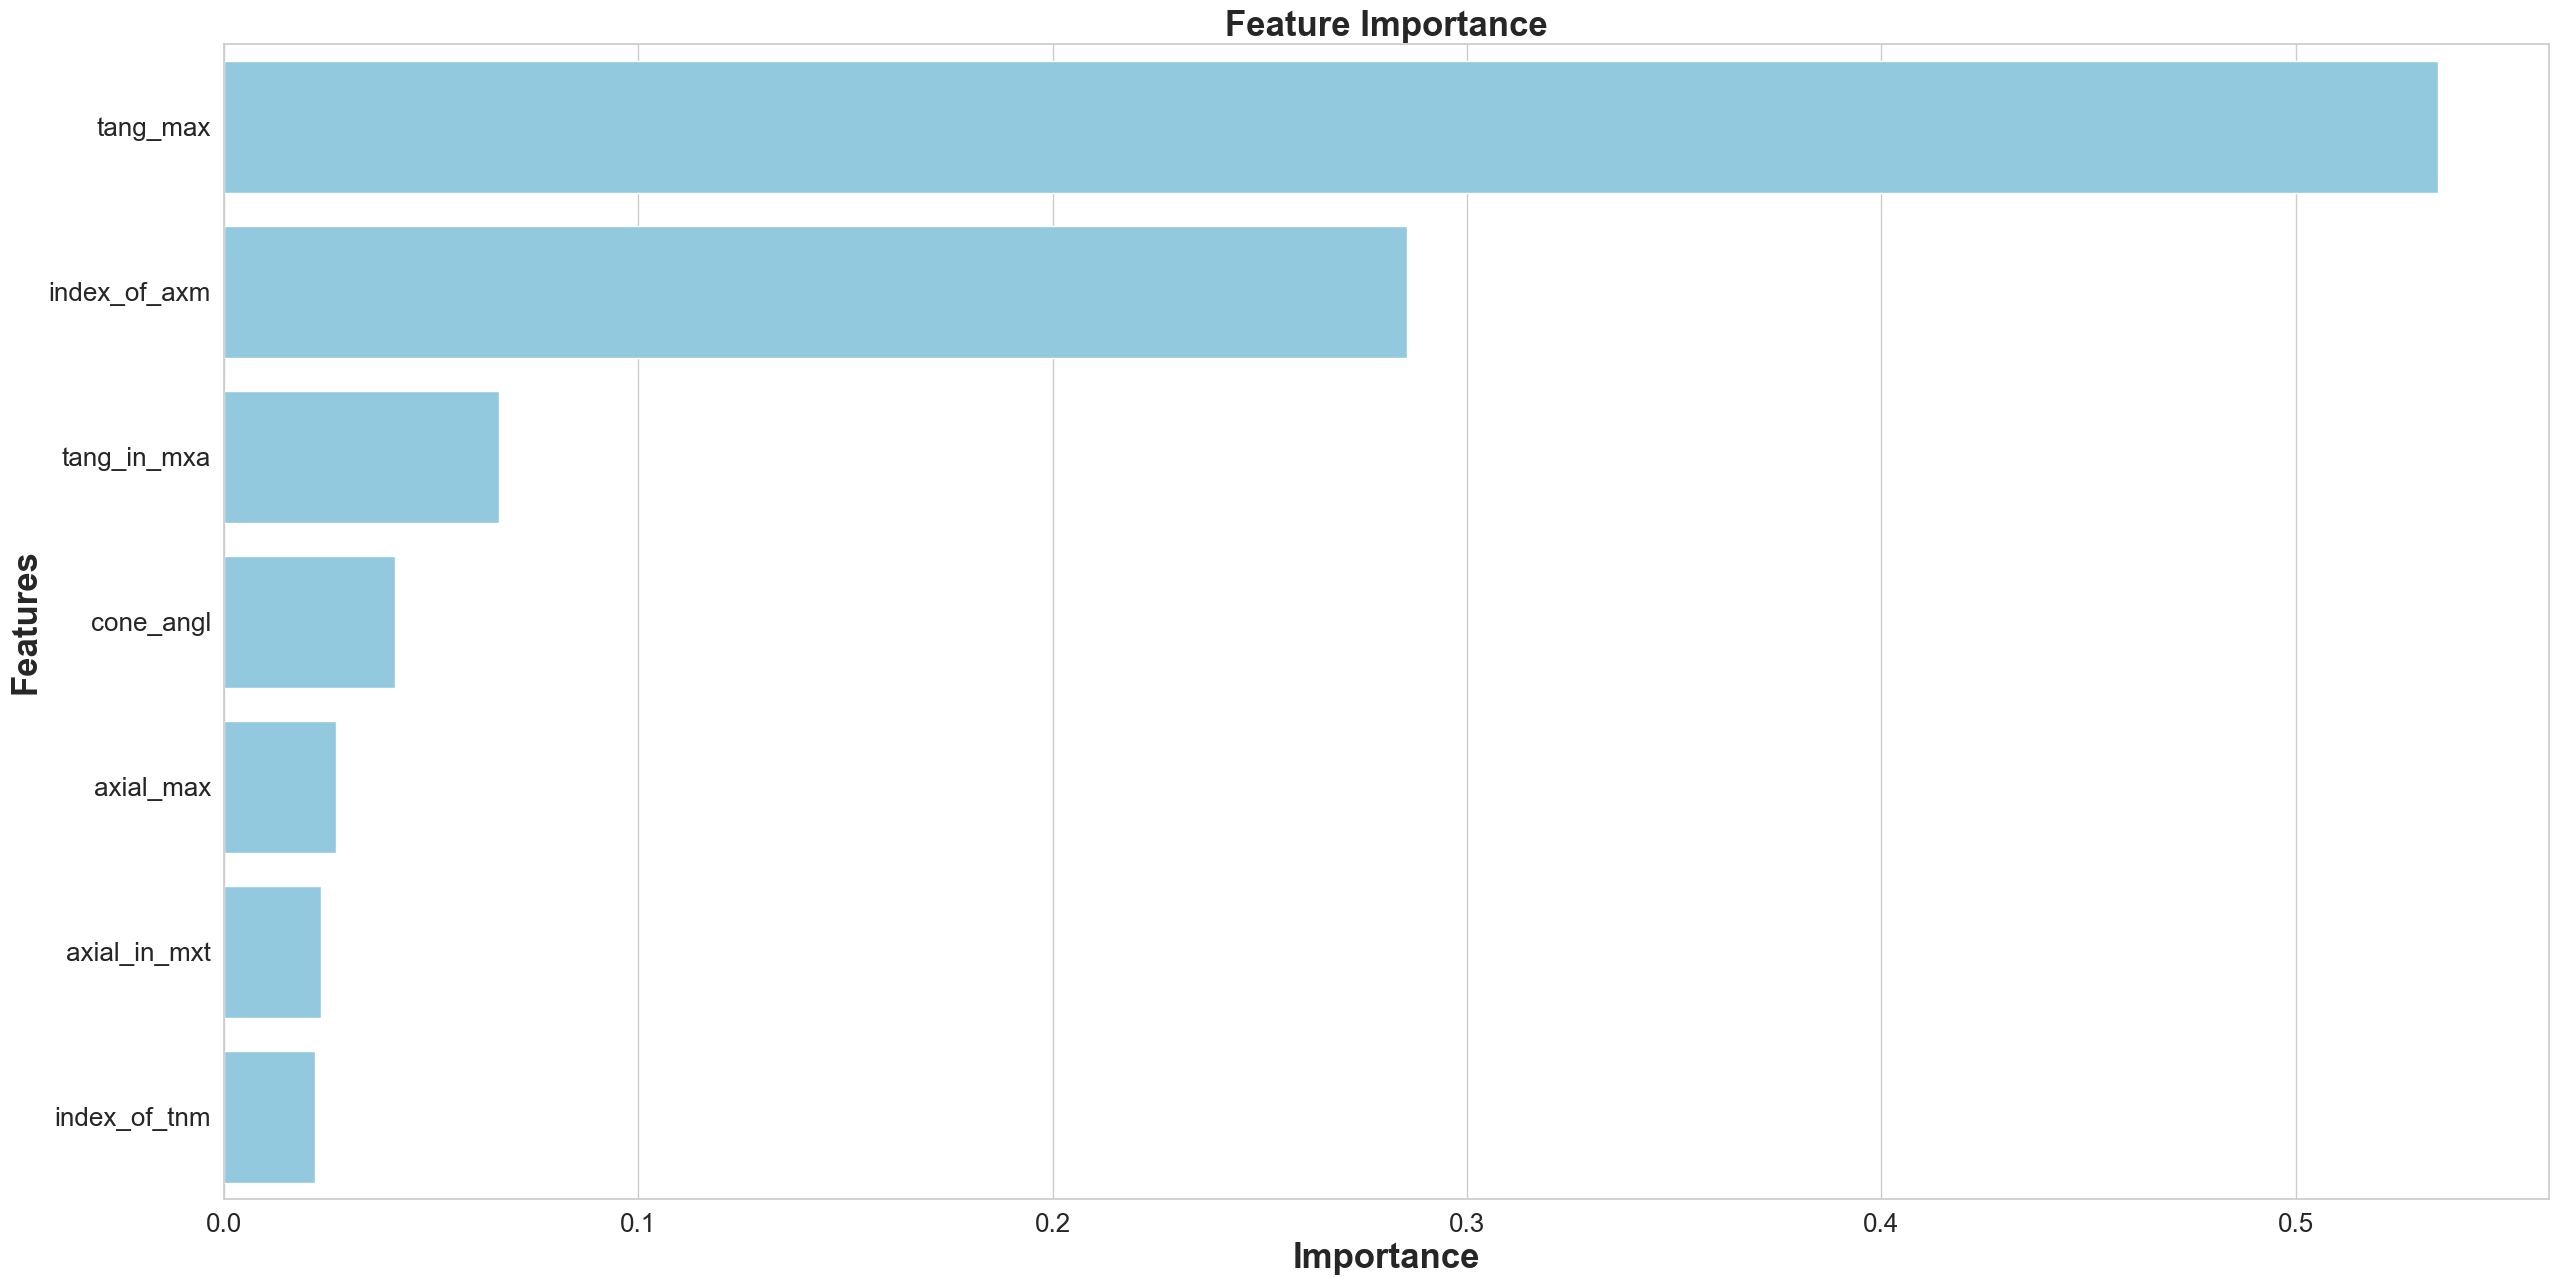

None

,Features,Gini-Importance
0,tang_max,0.534444
1,index_of_axm,0.285517
2,tang_in_mxa,0.066474
3,cone_angl,0.041259
4,axial_max,0.027055
5,axial_in_mxt,0.023351
6,index_of_tnm,0.021899


In [11]:
feats = {}
for feature, importance in zip(df.columns, rfc.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-Importance'})
importances = importances.sort_values(by='Gini-Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
sns.set(font_scale = 5)
sns.set(style="whitegrid", color_codes=True, font_scale = 1.7)
fig, ax = plt.subplots()
fig.set_size_inches(30,15)
sns.barplot(x=importances['Gini-Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.xlabel('Importance', fontsize=25, weight = 'bold')
plt.ylabel('Features', fontsize=25, weight = 'bold')
plt.title('Feature Importance', fontsize=25, weight = 'bold')
display(plt.show())
display(importances)

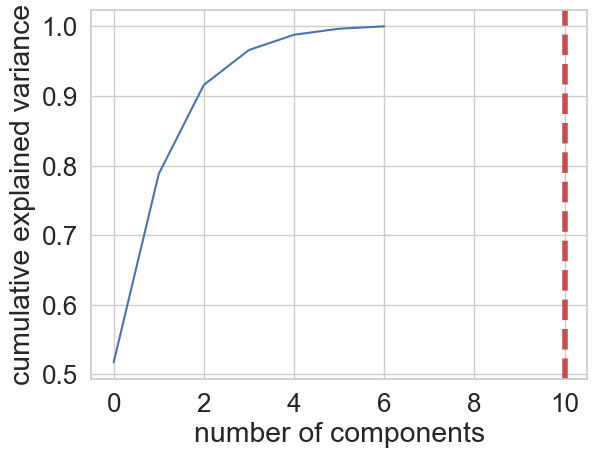

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.517396,0.517396
1,0.788050,0.270654
2,0.915933,0.127883
3,0.965982,0.050049
4,0.987904,0.021922
5,0.996568,0.008664
6,1.000000,0.003432


,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6
axial_max,-0.357671,-0.435810,-0.163252,-0.519121,0.616171,0.064123,0.047169
tang_max,-0.498983,0.170870,0.040267,-0.180945,-0.212643,-0.456421,-0.658726
index_of_axm,0.380440,-0.446069,-0.155138,-0.324993,-0.414565,0.383306,-0.455863
index_of_tnm,0.476253,0.130337,0.043286,-0.590065,-0.077120,-0.575931,0.261727
axial_in_mxt,-0.037478,-0.677724,-0.227184,0.401643,-0.179946,-0.521634,0.147897
tang_in_mxa,-0.500091,-0.019149,0.004930,-0.287321,-0.603992,0.191842,0.515127
cone_angl,-0.006283,-0.324393,0.945595,-0.010232,0.010865,-0.006568,-0.017729


In [14]:
# Let's use full components method to know the most important
pca_test = PCA(n_components=7)
pca_test.fit(X_train)
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=10, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))
pca = PCA(n_components=7)
pca.fit(X_train)
X_train_scaled_pca = pca.transform(X_train)
X_test_scaled_pca = pca.transform(X_test)
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=list(X_obj.columns.values), index=pca_dims)
pca_test_df.head(10).T